In [1]:
import tensorflow as tf
#tf.__version__

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D

In [2]:
#Data
from tensorflow.keras.preprocessing import image

In [3]:
Train_data_gen = image.ImageDataGenerator(rescale=1./255)
Test_data_gen = image.ImageDataGenerator(rescale=1./255)

In [4]:
train_set = Train_data_gen.flow_from_directory("dataset/training",target_size=(64,64),class_mode="binary")

Found 98 images belonging to 2 classes.


In [5]:
test_set = Test_data_gen.flow_from_directory("dataset/test",target_size=(64,64),class_mode="binary")

Found 38 images belonging to 2 classes.


In [6]:
train_set.class_indices

{'cats': 0, 'dogs': 1}

In [21]:
classifier = Sequential()

In [22]:
## Convolution(64 feature detector of dimension 3 by 3), input shape 3 layer for color image)
classifier.add(Conv2D(128,(3,3),input_shape = (64,64,3), activation = 'relu'))
## MaxPooling
classifier.add(MaxPooling2D(pool_size = (2,2)))
## Add another layer
classifier.add(Conv2D(64,(3,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))

## Add another layer
classifier.add(Conv2D(64,(3,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))

In [23]:
classifier.add(Flatten())

In [25]:
classifier.add(Dense(units=128,activation='relu'))
classifier.add(Dense(units=64,activation='relu'))
classifier.add(Dense(units=32,activation='relu'))
classifier.add(Dense(units=12,activation='relu'))
classifier.add(Dense(units=1,activation='sigmoid'))

In [26]:
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 62, 62, 128)       3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 29, 64)        73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)             

In [28]:
classifier.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [30]:
classifier.fit(train_set,epochs=100,validation_data=test_set)

Epoch 1/100
4/4 [==============================] - 1s 256ms/step - loss: 0.6935 - accuracy: 0.5000 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 2/100
4/4 [==============================] - 1s 172ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/100
4/4 [==============================] - 1s 152ms/step - loss: 0.6927 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5789
Epoch 4/100
4/4 [==============================] - 1s 213ms/step - loss: 0.6933 - accuracy: 0.4898 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 5/100
4/4 [==============================] - 1s 156ms/step - loss: 0.6929 - accuracy: 0.5000 - val_loss: 0.6948 - val_accuracy: 0.5000
Epoch 6/100
4/4 [==============================] - 1s 228ms/step - loss: 0.7017 - accuracy: 0.5000 - val_loss: 0.7023 - val_accuracy: 0.5000
Epoch 7/100
4/4 [==============================] - 1s 217ms/step - loss: 0.6952 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 8/100
4

Epoch 59/100
4/4 [==============================] - 1s 178ms/step - loss: 0.1032 - accuracy: 0.9694 - val_loss: 1.4107 - val_accuracy: 0.6842
Epoch 60/100
4/4 [==============================] - 1s 177ms/step - loss: 0.1038 - accuracy: 0.9592 - val_loss: 1.6804 - val_accuracy: 0.6842
Epoch 61/100
4/4 [==============================] - 1s 182ms/step - loss: 0.0481 - accuracy: 0.9796 - val_loss: 1.7482 - val_accuracy: 0.7105
Epoch 62/100
4/4 [==============================] - 1s 230ms/step - loss: 0.4988 - accuracy: 0.8878 - val_loss: 1.4378 - val_accuracy: 0.6316
Epoch 63/100
4/4 [==============================] - 1s 227ms/step - loss: 0.3452 - accuracy: 0.8265 - val_loss: 0.8600 - val_accuracy: 0.6316
Epoch 64/100
4/4 [==============================] - 1s 156ms/step - loss: 0.2417 - accuracy: 0.8980 - val_loss: 0.8024 - val_accuracy: 0.6842
Epoch 65/100
4/4 [==============================] - 1s 220ms/step - loss: 0.2760 - accuracy: 0.9184 - val_loss: 1.0677 - val_accuracy: 0.6316
Epoch 

In [31]:
classifier.save('Model.h5')

In [46]:
test_image = image.load_img('dataset\\inference\\cat1.jpg' ,target_size =(64,64))

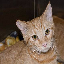

In [47]:
test_image

In [48]:
test_image = image.img_to_array(test_image)

In [49]:
test_image=test_image.reshape(1,64,64,3)

In [50]:
result = classifier.predict(test_image)

In [51]:
result

array([[0.]], dtype=float32)

In [52]:
if result == 1:
    prediction = 'dog'
else:
    prediction = 'cat'
prediction

'cat'